# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


точек внутри круга 136 точек вне круга 264
точек внутри треугольника 67 точек вне треугольника 333


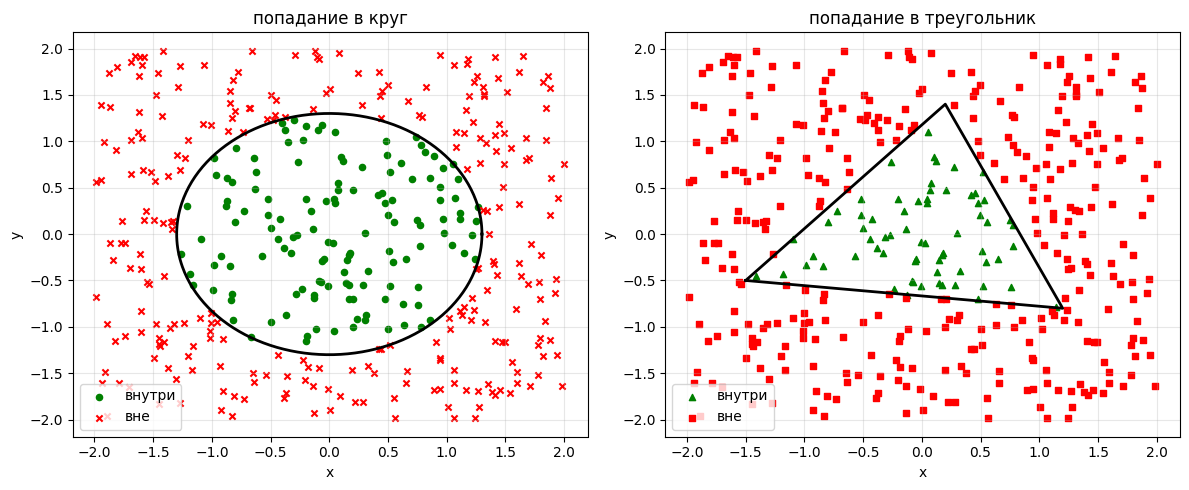

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import random

# классы и генераторы
@dataclass
class Point:
    x: float
    y: float
    def __str__(self):
        return f"точка {self.x:.2f} {self.y:.2f}"

@dataclass
class Circle:
    center: Point
    radius: float
    def point_in_circle(self, p: Point) -> bool:
        dx = p.x - self.center.x
        dy = p.y - self.center.y
        return dx*dx + dy*dy <= self.radius*self.radius

@dataclass
class Triangle:
    a: Point
    b: Point
    c: Point
    def point_in_triangle(self, p: Point) -> bool:
        def cross(u: Point, v: Point, w: Point):
            return (v.x - u.x)*(w.y - u.y) - (v.y - u.y)*(w.x - u.x)
        c1 = cross(self.a, self.b, p)
        c2 = cross(self.b, self.c, p)
        c3 = cross(self.c, self.a, p)
        has_pos = c1 > 0 or c2 > 0 or c3 > 0
        has_neg = c1 < 0 or c2 < 0 or c3 < 0
        return not (has_pos and has_neg)

def generate_points(xmin, xmax, ymin, ymax, n):
    xs = np.random.uniform(xmin, xmax, size=n)
    ys = np.random.uniform(ymin, ymax, size=n)
    return [Point(float(x), float(y)) for x, y in zip(xs, ys)]

# пример фигур
circle = Circle(center=Point(0.0, 0.0), radius=1.3)
tri = Triangle(Point(-1.5, -0.5), Point(1.2, -0.8), Point(0.2, 1.4))

# область генерации точек
xmin, xmax, ymin, ymax = -2.0, 2.0, -2.0, 2.0
pts = generate_points(xmin, xmax, ymin, ymax, 400)

# классификация
inside_circle = [p for p in pts if circle.point_in_circle(p)]
outside_circle = [p for p in pts if not circle.point_in_circle(p)]
inside_tri = [p for p in pts if tri.point_in_triangle(p)]
outside_tri = [p for p in pts if not tri.point_in_triangle(p)]

print(f"точек внутри круга {len(inside_circle)} точек вне круга {len(outside_circle)}")
print(f"точек внутри треугольника {len(inside_tri)} точек вне треугольника {len(outside_tri)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# отображение круга
ax = axes[0]
theta = np.linspace(0, 2*np.pi, 400)
ax.plot(circle.center.x + circle.radius*np.cos(theta), circle.center.y + circle.radius*np.sin(theta), 'k-', lw=2)
ax.scatter([p.x for p in inside_circle], [p.y for p in inside_circle], c='green', s=20, marker='o', label='внутри')
ax.scatter([p.x for p in outside_circle], [p.y for p in outside_circle], c='red', s=20, marker='x', label='вне')
ax.set_title('попадание в круг')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()

# отображение треугольника
ax = axes[1]
ax.plot([tri.a.x, tri.b.x, tri.c.x, tri.a.x], [tri.a.y, tri.b.y, tri.c.y, tri.a.y], 'k-', lw=2)
ax.scatter([p.x for p in inside_tri], [p.y for p in inside_tri], c='green', s=20, marker='^', label='внутри')
ax.scatter([p.x for p in outside_tri], [p.y for p in outside_tri], c='red', s=20, marker='s', label='вне')
ax.set_title('попадание в треугольник')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


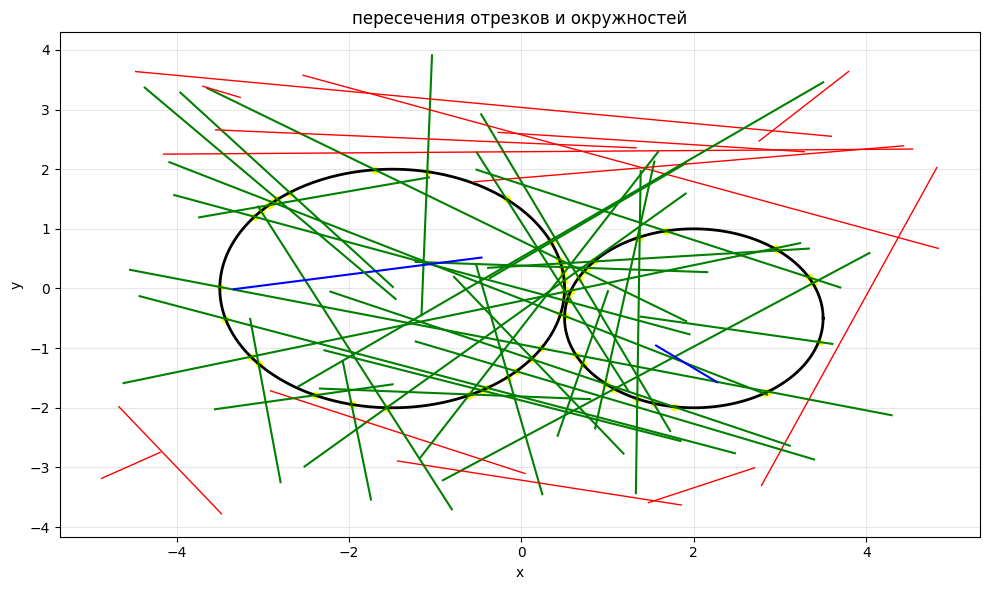

In [3]:
import math

# классы и генераторы часть 2 пересечения отрезков и окружностей
class Segment:
    def __init__(self, a: Point, b: Point):
        self.a = a
        self.b = b
    def __str__(self):
        return f"отрезок {self.a.x:.2f} {self.a.y:.2f} {self.b.x:.2f} {self.b.y:.2f}"
    def length(self):
        return math.hypot(self.b.x - self.a.x, self.b.y - self.a.y)
    def intersects_circle(self, circle: Circle):
        # проекция точки центра на прямую и проверка расстояния до окружности
        ax, ay = self.a.x, self.a.y
        bx, by = self.b.x, self.b.y
        cx, cy = circle.center.x, circle.center.y
        vx, vy = bx - ax, by - ay
        wx, wy = cx - ax, cy - ay
        seg_len2 = vx*vx + vy*vy
        if seg_len2 == 0:
            d2 = (ax - cx)**2 + (ay - cy)**2
            return d2 <= circle.radius**2, []
        t = max(0.0, min(1.0, (wx*vx + wy*vy) / seg_len2))
        px, py = ax + t*vx, ay + t*vy
        d2 = (px - cx)**2 + (py - cy)**2
        intersects = d2 <= circle.radius**2
        # по желанию возвращаем точки пересечения решения квадратного уравнения
        # вычислим пересечения если есть
        dx, dy = vx, vy
        fx, fy = ax - cx, ay - cy
        a = dx*dx + dy*dy
        b = 2*(fx*dx + fy*dy)
        c = fx*fx + fy*fy - circle.radius**2
        disc = b*b - 4*a*c
        pts = []
        if disc >= 0:
            sqrt_disc = math.sqrt(disc)
            for t0 in [(-b - sqrt_disc)/(2*a), (-b + sqrt_disc)/(2*a)]:
                if 0.0 <= t0 <= 1.0:
                    pts.append(Point(ax + t0*dx, ay + t0*dy))
        return intersects, pts
    def intersects_segment(self, other):
        def orient(a, b, c):
            return (b.x - a.x)*(c.y - a.y) - (b.y - a.y)*(c.x - a.x)
        def on_seg(a, b, c):
            return min(a.x, b.x) <= c.x <= max(a.x, b.x) and min(a.y, b.y) <= c.y <= max(a.y, b.y)
        o1 = orient(self.a, self.b, other.a)
        o2 = orient(self.a, self.b, other.b)
        o3 = orient(other.a, other.b, self.a)
        o4 = orient(other.a, other.b, self.b)
        if o1 == 0 and on_seg(self.a, self.b, other.a):
            ip = other.a
            return True, ip
        if o2 == 0 and on_seg(self.a, self.b, other.b):
            ip = other.b
            return True, ip
        if o3 == 0 and on_seg(other.a, other.b, self.a):
            ip = self.a
            return True, ip
        if o4 == 0 and on_seg(other.a, other.b, self.b):
            ip = self.b
            return True, ip
        if (o1 > 0) != (o2 > 0) and (o3 > 0) != (o4 > 0):
            # найти точку пересечения параметрически
            x1, y1, x2, y2 = self.a.x, self.a.y, self.b.x, self.b.y
            x3, y3, x4, y4 = other.a.x, other.a.y, other.b.x, other.b.y
            den = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
            if den == 0:
                return True, None
            px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / den
            py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / den
            return True, Point(px, py)
        return False, None

def generate_segments(n, xmin, xmax, ymin, ymax):
    segs = []
    for _ in range(n):
        ax = random.uniform(xmin, xmax)
        ay = random.uniform(ymin, ymax)
        bx = random.uniform(xmin, xmax)
        by = random.uniform(ymin, ymax)
        segs.append(Segment(Point(ax, ay), Point(bx, by)))
    return segs

# генерация
xmin, xmax, ymin, ymax = -5, 5, -4, 4
segs = generate_segments(50, xmin, xmax, ymin, ymax)
test_circles = [Circle(Point(-1.5, 0.0), 2.0), Circle(Point(2.0, -0.5), 1.5)]

# визуализация
fig, ax = plt.subplots(figsize=(10, 6))
colors = []
for c in test_circles:
    th = np.linspace(0, 2*np.pi, 300)
    ax.plot(c.center.x + c.radius*np.cos(th), c.center.y + c.radius*np.sin(th), 'k-', lw=2)
for s in segs:
    # классификация сегмента
    inter_any = False
    inside_any = False
    pts_all = []
    for c in test_circles:
        inter, pts = s.intersects_circle(c)
        inter_any = inter_any or inter
        pts_all.extend(pts)
        # проверка обе точки внутри
        inside = c.point_in_circle(s.a) and c.point_in_circle(s.b)
        inside_any = inside_any or inside
    if inside_any:
        ax.plot([s.a.x, s.b.x], [s.a.y, s.b.y], color='blue', lw=1.5)
    elif inter_any:
        ax.plot([s.a.x, s.b.x], [s.a.y, s.b.y], color='green', lw=1.5)
    else:
        ax.plot([s.a.x, s.b.x], [s.a.y, s.b.y], color='red', lw=1.0)
    for p in pts_all:
        ax.scatter(p.x, p.y, c='yellow', s=20)
ax.set_title('пересечения отрезков и окружностей')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


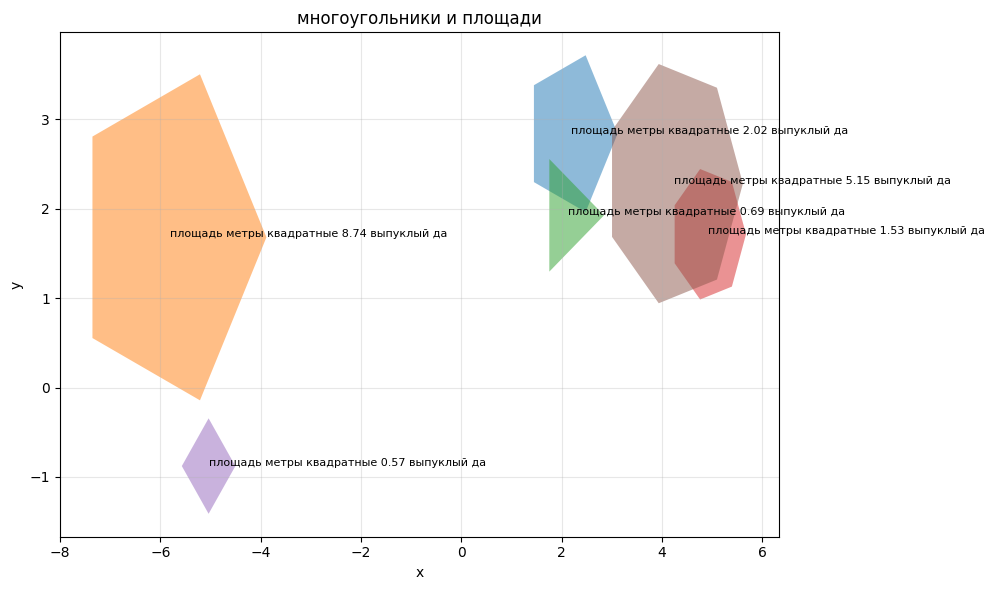

In [4]:
# классы и генераторы часть 3 многоугольники и формула гаусса
class Polygon:
    def __init__(self, vertices):
        self.vertices = vertices
    def __str__(self):
        return 'многоугольник ' + ' '.join(f"{v.x:.2f} {v.y:.2f}" for v in self.vertices)
    def area(self):
        xs = [v.x for v in self.vertices]
        ys = [v.y for v in self.vertices]
        n = len(self.vertices)
        s = 0.0
        for i in range(n):
            j = (i + 1) % n
            s += xs[i]*ys[j] - xs[j]*ys[i]
        return abs(s) * 0.5
    def centroid(self):
        n = len(self.vertices)
        ax = sum(v.x for v in self.vertices) / n
        ay = sum(v.y for v in self.vertices) / n
        return Point(ax, ay)
    def is_convex(self):
        n = len(self.vertices)
        if n < 4:
            return True
        sign = 0
        for i in range(n):
            p0 = self.vertices[i]
            p1 = self.vertices[(i+1) % n]
            p2 = self.vertices[(i+2) % n]
            cross = (p1.x - p0.x)*(p2.y - p0.y) - (p1.y - p0.y)*(p2.x - p0.x)
            if cross != 0:
                if sign == 0:
                    sign = 1 if cross > 0 else -1
                elif (cross > 0) != (sign > 0):
                    return False
        return True

def generate_regular_polygon(sides, center: Point, radius):
    ang = np.linspace(0, 2*np.pi, sides, endpoint=False)
    return Polygon([Point(center.x + radius*np.cos(a), center.y + radius*np.sin(a)) for a in ang])

def generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8):
    polys = []
    for _ in range(n):
        sides = random.randint(min_sides, max_sides)
        cx = random.uniform(xmin, xmax)
        cy = random.uniform(ymin, ymax)
        r = random.uniform(0.5, 2.0)
        poly = generate_regular_polygon(sides, Point(cx, cy), r)
        polys.append(poly)
    return polys

# визуализация примеров
polys = generate_polygons(6, -6, 6, -4, 4)
fig, ax = plt.subplots(figsize=(10, 6))
for poly in polys:
    xs = [v.x for v in poly.vertices] + [poly.vertices[0].x]
    ys = [v.y for v in poly.vertices] + [poly.vertices[0].y]
    ax.fill(xs, ys, alpha=0.5)
    cen = poly.centroid()
    area_m2 = poly.area()
    txt = f"площадь метры квадратные {area_m2:.2f} выпуклый {'да' if poly.is_convex() else 'нет'}"
    ax.text(cen.x, cen.y, txt, fontsize=8)
ax.set_title('многоугольники и площади')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [1]:
print(int(input("Введите номер в списке: "))%6)

5


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


расчет площади водохранилище приозерное смоленская область
площадь метры квадратные 311400.00
площадь гектары 31.14
классификация крупный водоем


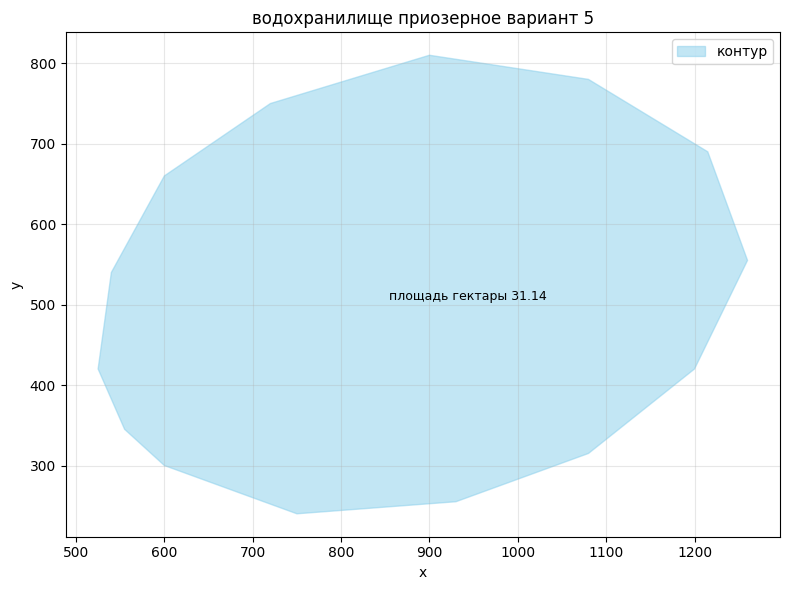

In [ ]:
# расчет площади водохранилище приозерное 
pixels = [
    (200, 100), (250, 80), (310, 85), (360, 105),
    (400, 140), (420, 185), (405, 230), (360, 260),
    (300, 270), (240, 250), (200, 220), (180, 180),
    (175, 140), (185, 115)
]
scale = 3.0  # метры на пиксель
threshold_ha = 20.0

# перевод пикселей в метры
verts_m = [Point(px*scale, py*scale) for px, py in pixels]
poly = Polygon(verts_m)
area_m2 = poly.area()
area_ha = area_m2 / 10000.0
cls = 'крупный водоем' if area_ha >= threshold_ha else 'малое озеро'

print('расчет площади водохранилище приозерное смоленская область')
print(f"площадь метры квадратные {area_m2:.2f}")
print(f"площадь гектары {area_ha:.2f}")
print(f"классификация {cls}")

# визуализация контура
fig, ax = plt.subplots(figsize=(8, 6))
xs = [v.x for v in poly.vertices] + [poly.vertices[0].x]
ys = [v.y for v in poly.vertices] + [poly.vertices[0].y]
ax.fill(xs, ys, color='skyblue', alpha=0.5, label='контур')
cen = poly.centroid()
ax.text(cen.x, cen.y, f"площадь гектары {area_ha:.2f}", fontsize=9)
ax.set_title('водохранилище приозерное вариант 5')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()